# RAPIDS - Complete project

## Installation

In [1]:
! git clone https://github.com/rapidsai/rapidsai-csp-utils.git
! pip install --upgrade pip
! python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 490, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 490 (delta 149), reused 124 (delta 91), pack-reused 269 (from 1)
Receiving objects: 100% (490/490), 136.70 KiB | 2.63 MiB/s, done.
Resolving deltas: 100% (251/251), done.
  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Installing the rest of the RAPIDS 24.4.* libraries
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cudf
import cupy # as cp
print(cudf.__version__) # 23.12.01
print(cupy.__version__)   # 13.0.0

24.04.01
12.2.0


# Census dataset

- Dataset information: https://archive.ics.uci.edu/ml/datasets/adult

In [25]:
census = cudf.read_csv('census.csv') # pd.read_csv

In [26]:
type(census),

(cudf.core.dataframe.DataFrame,)

In [27]:
census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [28]:
census.describe()

,age,final-weight,education-num,capital-gain,capital-loss,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [29]:
census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hour-per-week     0
native-country    0
income            0
dtype: int64

## Visualizing the data

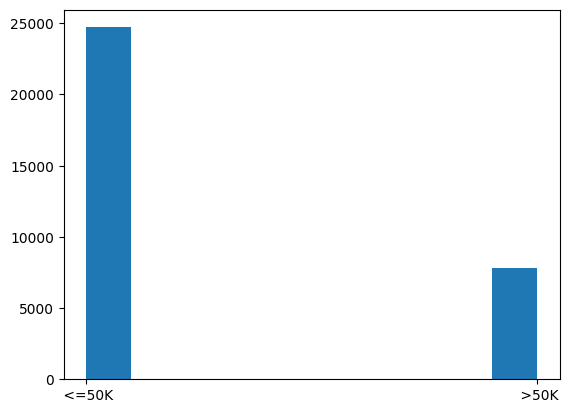

In [30]:
plt.hist(x = census["income"]);

## Creating the variables

In [31]:
census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [32]:
X_census = census.iloc[:, 0:14]

In [33]:
X_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hour-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [34]:
y_census = census.iloc[:, 14]

In [35]:
y_census

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

In [36]:
type(X_census), type(y_census)

(cudf.core.dataframe.DataFrame, cudf.core.series.Series)

## Categorical features

### LabelEncoder

Converts strings to integers

In [37]:
from cuml.preprocessing import LabelEncoder

In [38]:
label_encoder_test = LabelEncoder()

In [39]:
X_census['workclass'].value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [20]:
test = label_encoder_test.fit_transform(X_census["workclass"])

In [21]:
test

0        7
1        6
2        4
3        4
4        4
        ..
32556    4
32557    4
32558    4
32559    4
32560    5
Length: 32561, dtype: uint8

In [22]:
X_census["workclass"] = test
X_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,inative-country
0,39,7,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,6,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,4,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,4,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,4,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [40]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [41]:
X_census['workclass'] = label_encoder_workclass.fit_transform(X_census['workclass'])
X_census['education'] = label_encoder_education.fit_transform(X_census['education'])
X_census['marital-status'] = label_encoder_marital.fit_transform(X_census['marital-status'])
X_census['occupation'] = label_encoder_occupation.fit_transform(X_census['occupation'])
X_census['relationship'] = label_encoder_relationship.fit_transform(X_census['relationship'])
X_census['race'] = label_encoder_race.fit_transform(X_census['race'])
X_census['sex'] = label_encoder_sex.fit_transform(X_census['sex'])
X_census['native-country'] = label_encoder_country.fit_transform(X_census['native-country'])

In [42]:
X_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hour-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [43]:
categorical_columns = [1, 3, 5, 6, 7, 8, 9, 13]

In [44]:
type(X_census),

(cudf.core.dataframe.DataFrame,)

In [45]:
X_census = cupy.from_dlpack(X_census.to_dlpack())

In [46]:
X_census

array([[    39,      7,  77516, ...,      0,     40,     39],
       [    50,      6,  83311, ...,      0,     13,     39],
       [    38,      4, 215646, ...,      0,     40,     39],
       ...,
       [    58,      4, 151910, ...,      0,     40,     39],
       [    22,      4, 201490, ...,      0,     20,     39],
       [    52,      5, 287927, ...,      0,     40,     39]])

In [47]:
type(X_census)

cupy.ndarray

### OneHotEncoder

In [48]:
# Banana, Apple
# 0, 4

# 1, 0 - Banana
# 0, 1 - Apple

In [49]:
from cuml.preprocessing import OneHotEncoder
from cuml.compose import ColumnTransformer

In [50]:
print(len(np.unique(census['workclass'])))
np.unique(census['workclass'])

9


5                    ?
3          Federal-gov
4            Local-gov
8         Never-worked
2              Private
6         Self-emp-inc
1     Self-emp-not-inc
0            State-gov
7          Without-pay
Name: workclass, dtype: object

In [51]:
print(len(np.unique(census['occupation'])))
np.unique(census['occupation'])

15


11                     ?
0           Adm-clerical
13          Armed-Forces
6           Craft-repair
1        Exec-managerial
8        Farming-fishing
2      Handlers-cleaners
9      Machine-op-inspct
4          Other-service
14       Priv-house-serv
3         Prof-specialty
12       Protective-serv
5                  Sales
10          Tech-support
7       Transport-moving
Name: occupation, dtype: object

In [52]:
onehotencoder_census = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(sparse=False), categorical_columns)], remainder = 'passthrough')

In [53]:
X_census = onehotencoder_census.fit_transform(X_census)

In [54]:
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [55]:
census.shape

(32561, 15)

In [56]:
X_census.shape

(32561, 108)

In [57]:
type(X_census)

cupy.ndarray

In [58]:
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

## Standardization

In [59]:
X_census[0:2] # rows 0 & 1

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

In [60]:
from cuml.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [61]:
X_census[0:2] # rows 0 & 1

array([[-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
        -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
        -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
        -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
        -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
        -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
        -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
        -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
        -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
        -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
        -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
        -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
        -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
        -0.05409379, -0.04641598, -0.02933708, -0.0

## Train and test data

In [62]:
from cuml.model_selection import train_test_split

In [63]:
y_census

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

In [64]:
y_census = LabelEncoder().fit_transform(y_census)
y_census

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Length: 32561, dtype: uint8

In [65]:
X_census_train, X_census_test, y_census_train, y_census_test = train_test_split(X_census, y_census,
                                                                                test_size = 0.15, random_state = 42)

In [66]:
X_census_train.shape, y_census_train.shape

((27677, 108), (27677,))

In [67]:
X_census_test.shape, y_census_test.shape

((4884, 108), (4884,))

## Saving the variables

In [68]:
import pickle

In [69]:
with open('census.pkl', mode = "wb") as f:
  pickle.dump([X_census_train, y_census_train, X_census_test, y_census_test], f)

In [70]:
with open('census.pkl', mode = "rb") as f:
  X_census_train_p, y_census_train_p, X_census_test_p, y_census_test_p = pickle.load(f)

In [74]:
import cupy

In [77]:
print(cupy.array_equal (X_census_train_p, X_census_train))
print(cupy.array_equal (X_census_test_p, X_census_test))
print(cupy.array_equal (y_census_train_p, y_census_train))
print(cupy.array_equal (y_census_test_p, y_census_test))

True
True
True
True


In [78]:
X_census_train = X_census_train_p
y_census_train = y_census_train_p
X_census_test = X_census_test_p
y_census_test = y_census_test_p

In [79]:
X_census_train.shape, y_census_train.shape

((27677, 108), (27677,))

In [80]:
X_census_test.shape, y_census_test.shape

((4884, 108), (4884,))

In [81]:
type(X_census_train), type(y_census_train), type(X_census_test), type(y_census_train)

(cupy.ndarray, cupy.ndarray, cupy.ndarray, cupy.ndarray)

# Logistic regression




In [82]:
from cuml.linear_model import LogisticRegression

In [83]:
logistic_census = LogisticRegression()
logistic_census.fit(X_census_train, y_census_train)

LogisticRegression()

In [84]:
predictions = logistic_census.predict(X_census_test)
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [85]:
y_census_test

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [86]:
from cuml.metrics import accuracy_score, confusion_matrix
accuracy_score(y_census_test, predictions)

0.8480753302574158

In [88]:
confusion_matrix(y_census_test, predictions, convert_dtype=True)

array([[3428,  231],
       [ 511,  714]])

# kNN

In [89]:
from cuml.neighbors import KNeighborsClassifier

In [90]:
knn_census = KNeighborsClassifier(n_neighbors = 10)
knn_census.fit(X_census_train, y_census_train)

KNeighborsClassifier()

In [91]:
predictions = knn_census.predict(X_census_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [92]:
y_census_test

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [93]:
accuracy_score(y_census_test, predictions)

0.8233006000518799

In [94]:
confusion_matrix(y_census_test, predictions, convert_dtype=True)

array([[3423,  236],
       [ 627,  598]])

# Random Forest

In [95]:
from cuml.ensemble import RandomForestClassifier

`split_criterion` (it is `criterion` in sklearn):

* 0 or 'gini' - gini impurity
* 1 or 'entropy' - information gain (entropy)
* 2 or 'mse' - mean squared error
* 4 or 'poisson' - poisson half deviance
* 5 or 'gamma' - gamma half deviance
* 6 or 'inverse_gaussian' - inverse gaussian deviance

(Documentation: https://docs.rapids.ai/api/cuml/nightly/api/#random-forest)

# sklearn: criterion{“gini”, “entropy”, “log_loss”}, default=”gini”

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation. Note: This parameter is tree-specific.


In [96]:
random_forest_census = RandomForestClassifier(n_estimators = 10, split_criterion="entropy", random_state = 42)
random_forest_census.fit(X_census_train, y_census_train)

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


RandomForestClassifier()

In [97]:
predictions = random_forest_census.predict(X_census_test)
predictions

array([0., 0., 0., ..., 1., 0., 0.])

In [98]:
y_census_test

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [99]:
accuracy_score(y_census_test, predictions)

0.8423423171043396

In [100]:
confusion_matrix(y_census_test, predictions, convert_dtype=True)

array([[3477,  182],
       [ 588,  637]])

# SVM

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

In [107]:
from cuml.svm import SVC
from cuml.svm import LinearSVC

In [102]:
svm_census = SVC(kernel = "linear", random_state = 1)
svm_census.fit(X_census_train, y_census_train);

[W] [18:01:51.014055] SVC with the linear kernel can be much faster using the specialized solver provided by LinearSVC. Consider switching to LinearSVC if tranining takes too long.


SVC()

In [103]:
predictions = svm_census.predict(X_census_test)
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [104]:
y_census_test

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [105]:
accuracy_score(y_census_test, predictions)

0.8456183671951294

In [106]:
confusion_matrix(y_census_test, predictions, convert_dtype=True)

array([[3450,  209],
       [ 545,  680]])